## Photon bunches stored via IACT output (blue: Cherenkov, red: fluorescence)
 - Shower impact point is always (0, 0)

## Requirements
Install **eventio** package ([pyeventio](https://github.com/fact-project/pyeventio)) to run this notebook.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from eventio import IACTFile
%matplotlib inline  

## IACT package for CORSIKA

Only those bunches hitting a grid element containing part of the projected shadow of a sphere on CORSIKA obervation level should be stored (see figure below)

![alt text](images/iact3d.png "CORSIKA IACT photon bunch selection")

# Vertical showers

IACTFile(
  path=../fluorescence-corsika/corsika-76300/output/run2_1TeV50sh0deg/iact_2.dat
  n_telescopes=4
  n_events=50
)


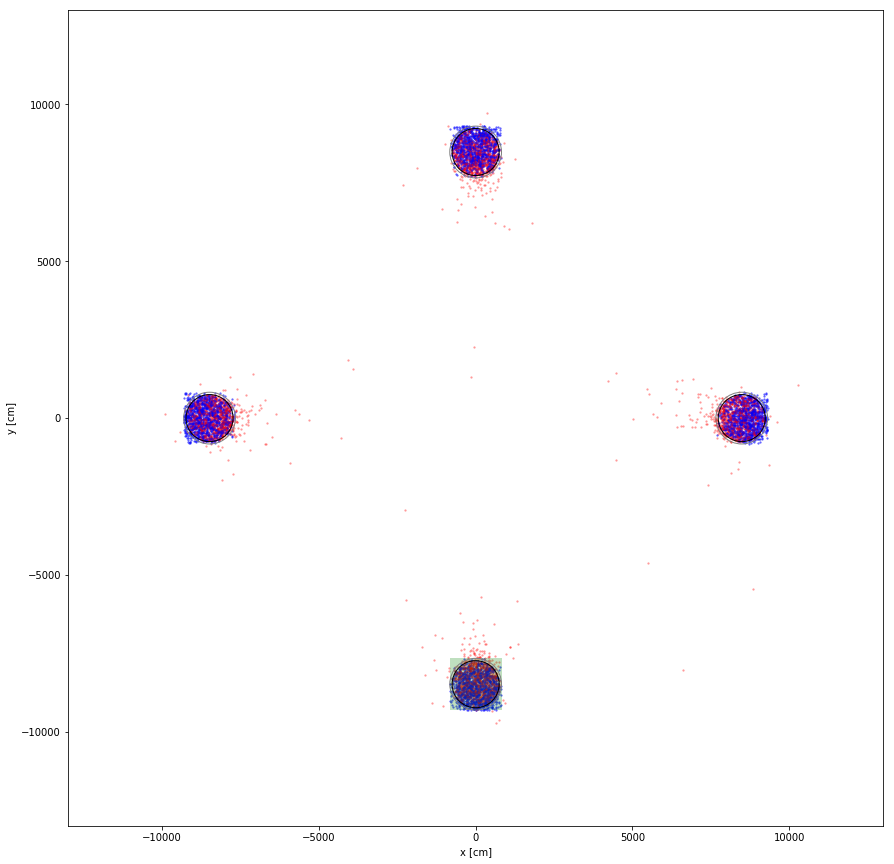

In [26]:
telescope_positions = np.array([[0., -8485.], [8485., 0.], [0., 8485.], [-8485., 0.]])

# Perpendicular projection
circle1 = plt.Circle((0, -8485), 750, color='black', fill=False)
circle2 = plt.Circle((8485, 0), 750, color='black', fill=False)
circle3 = plt.Circle((0, 8485), 750, color='black', fill=False)
circle4 = plt.Circle((-8485, 0), 750, color='black', fill=False)

projected_radius = 8.250000E+02

# Projection according to shower direction
proj_circle1 = plt.Circle((0, -8485), projected_radius, color='gray', fill=False)
proj_circle2 = plt.Circle((8485, 0), projected_radius, color='gray', fill=False)
proj_circle3 = plt.Circle((0, 8485), projected_radius, color='gray', fill=False)
proj_circle4 = plt.Circle((-8485, 0), projected_radius, color='gray', fill=False)

circles = [circle1, circle2, circle3, circle4,
           proj_circle1, proj_circle2, proj_circle3, proj_circle4
          ]

iact_file = "../fluorescence-corsika/corsika-76300/output/run2_1TeV50sh0deg/iact_2.dat"

fig, ax = plt.subplots(figsize=(15, 15))
ax.set_aspect(1)
ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_xlim(-13000,13000)
ax.set_ylim(-13000,13000)

with IACTFile(iact_file) as f:
    print(f)
    for n in range(len(f)):
        event = f[n]
        for itel, position in zip(event.photon_bunches, telescope_positions):
            
            f_bunches = event.photon_bunches[itel][event.photon_bunches[itel]['photons'] < 0]
            c_bunches = event.photon_bunches[itel][event.photon_bunches[itel]['photons'] > 0]
            
            #  Fluorescence bunches
            if any(f_bunches):
                for bunch in f_bunches:

                    cz = np.sqrt(1 - bunch['cx']**2 - bunch['cy']**2)
                    obslevel = event.header.observation_levels[0]
                    radius = 750.
                    
                    x_tel = bunch['x'] + position[0]
                    y_tel = bunch['y'] + position[1]
                    z_tel = obslevel + radius
                    
                    x_emis = x_tel - ((bunch['zem'] - z_tel) / cz) * bunch['cx']
                    y_emis = y_tel - ((bunch['zem'] - z_tel) / cz) * bunch['cy']
                    z_emis = bunch['zem']
                    
                    x_obs = x_tel + (radius / cz) * bunch['cx']
                    y_obs = y_tel + (radius / cz) * bunch['cy']
                    z_obs = obslevel
                    
                    
                    ax.scatter(x=x_tel,y=y_tel,
                               c='red', s=5, alpha=0.4, lw=0)
                    
                    ax.scatter(x=x_obs, y=y_obs,
                               c='blue', s=5, alpha=0.6, lw=0)
                    
# Plot grid and projections of the telescopes:
grid_x_low = -10000
grid_x_high = 10000
grid_y_low = -10000
grid_y_high = 10000

# ax.axvline(grid_x_low, color="green")
# ax.axvline(grid_x_high, color="green")
# ax.axhline(grid_y_low, color="green")
# ax.axhline(grid_y_high, color="green")

# for i in range(20):
#     ax.axvline(grid_x_low + 1000 * i, color="green", alpha=0.3)
#     ax.axhline(grid_y_low + 1000 * i, color="green", alpha=0.3)

for circle in circles:
    ax.add_artist(circle)
    
#ax.fill([grid_x_low, grid_x_high, grid_x_high, grid_x_low],
#        [grid_y_low, grid_y_low, grid_y_high, grid_y_high],
#        'green', alpha=0.1)

# Grid elements containing the telescope shadow
projected_radius = 825
center = 8485.

ax.fill([-projected_radius, projected_radius, projected_radius, -projected_radius],
       [-center-projected_radius, -center-projected_radius, -center+projected_radius, -center+projected_radius],
       'green', alpha=0.25)
# ax.fill([-1000, 1000, 1000, -1000],
#        [10000, 10000, 7000, 7000],
#        'green', alpha=0.1)
# ax.fill([-10000, -10000, -7000, -7000],
#        [-1000, 1000, 1000, -1000],
#        'green', alpha=0.1)
# ax.fill([10000, 10000, 7000, 7000],
#        [-1000, 1000, 1000, -1000],
#        'green', alpha=0.1)

 - Red points: projection of fluorescence photon bunches onto the mid-plane of the fiducial sphere.
 - Blue points: projection of fluorescence photon bunches over the CORSIKA detector level.
 - Black circumference: intersection of fiducial sphere with the horizontal mid-plane of the sphere (i.e. actual size of the detector)
 - The grid consists of 10x10 m^2 grid elements as defined in *iact.c*.
 - The size of the entire grid is the one provided by the debugging IACT info. 

# Inclined showers (Zd: 50 deg)

In these case, the shadows of the projected spheres are larger. Photon bunches end up within the telescope shadow on the observation level. Elliptical shadow of the bunches is placed in the middle of the telescope shadow, whereas the elliptical shadow at horizontal mid-plane of the fiducial sphere is centered around the intersection of the sphere with that mid-plane.


IACTFile(
  path=../fluorescence-corsika/corsika-76300/output/run1_1TeV50sh50deg/iact_1.dat
  n_telescopes=4
  n_events=50
)


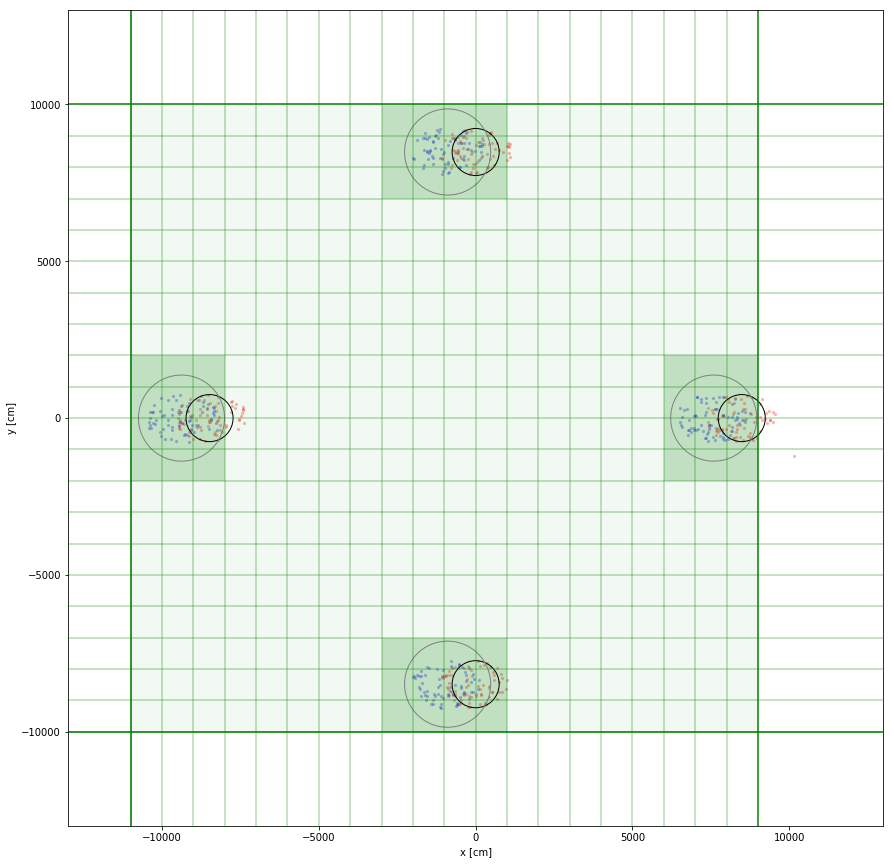

In [4]:
telescope_positions = np.array([[0., -8485.], [8485., 0.], [0., 8485.], [-8485., 0.]])

# Perpendicular projection
circle1 = plt.Circle((0, -8485), 750, color='black', fill=False)
circle2 = plt.Circle((8485, 0), 750, color='black', fill=False)
circle3 = plt.Circle((0, 8485), 750, color='black', fill=False)
circle4 = plt.Circle((-8485, 0), 750, color='black', fill=False)

projected_radius = 1.372854E+03

# Projection according to shower direction
proj_circle1 = plt.Circle((-8.938152E+02, -8.485000E+03), projected_radius, color='gray', fill=False)
proj_circle2 = plt.Circle((7.591185E+03, -7.813981E-05), projected_radius, color='gray', fill=False)
proj_circle3 = plt.Circle((-8.938152E+02, 8.485000E+03), projected_radius, color='gray', fill=False)
proj_circle4 = plt.Circle((-9.378815E+03, -7.813981E-05), projected_radius, color='gray', fill=False)

circles = [circle1, circle2, circle3, circle4,
           proj_circle1, proj_circle2, proj_circle3, proj_circle4]

iact_file = "../fluorescence-corsika/corsika-76300/output/run1_1TeV50sh50deg/iact_1.dat"

fig, ax = plt.subplots(figsize=(15, 15))
ax.set_aspect(1)
ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_xlim(-13000,13000)
ax.set_ylim(-13000,13000)


with IACTFile(iact_file) as f:
    print(f)
    for n in range(len(f)):
        event = f[n]
        for itel, position in zip(event.photon_bunches, telescope_positions):
            
            f_bunches = event.photon_bunches[itel][event.photon_bunches[itel]['photons'] < 0]
            c_bunches = event.photon_bunches[itel][event.photon_bunches[itel]['photons'] > 0]
            
            #  Fluorescence bunches
            if any(f_bunches):
                for bunch in f_bunches:

                    cz = np.sqrt(1 - bunch['cx']**2 - bunch['cy']**2)
                    obslevel = event.header.observation_levels[0]
                    radius = 750.
                    
                    x_tel = bunch['x'] + position[0]
                    y_tel = bunch['y'] + position[1]
                    z_tel = obslevel + radius
                    
                    x_emis = x_tel - ((bunch['zem'] - z_tel) / cz) * bunch['cx']
                    y_emis = y_tel - ((bunch['zem'] - z_tel) / cz) * bunch['cy']
                    z_emis = bunch['zem']
                    
                    x_obs = x_tel + (radius / cz) * bunch['cx']
                    y_obs = y_tel + (radius / cz) * bunch['cy']
                    z_obs = obslevel
                    
                    ax.scatter(x=x_tel, y=y_tel,
                        c='red', s=10, alpha=0.3, lw=0 )
                    
                    ax.scatter(x=x_obs, y=y_obs, 
                               c='blue', s=10, alpha=0.3, lw=0)

# Plot grid and projections of the telescopes:
grid_x_low = -11000
grid_x_high = 9000
grid_y_low = -10000
grid_y_high = 10000

ax.axvline(grid_x_low, color="green")
ax.axvline(grid_x_high, color="green")
ax.axhline(grid_y_low, color="green")
ax.axhline(grid_y_high, color="green")

for i in range(20):
    ax.axvline(grid_x_low + 1000 * i, color="green", alpha=0.3)
    ax.axhline(grid_y_low + 1000 * i, color="green", alpha=0.3)

for circle in circles:
    ax.add_artist(circle)
    
ax.fill([grid_x_low, grid_x_high, grid_x_high, grid_x_low],
        [grid_y_low, grid_y_low, grid_y_high, grid_y_high],
        'green', alpha=0.05)

# Grid elements containing the telescope shadow
ax.fill([-3000, 1000, 1000, -3000],
        [-10000, -10000, -7000, -7000],
        'green', alpha=0.2)
ax.fill([-3000, 1000, 1000, -3000],
        [10000, 10000, 7000, 7000],
        'green', alpha=0.2)
ax.fill([-11000, -11000, -8000, -8000],
        [-2000, 2000, 2000, -2000],
        'green', alpha=0.2)
ax.fill([9000, 9000, 6000, 6000],
        [-2000, 2000, 2000, -2000],
        'green', alpha=0.2)


 - Red points: projection of fluorescence photon bunches onto the mid-plane of the fiducial sphere.
 - Blue points: projection of fluorescence photon bunches over the CORSIKA detector level.
 - Black circumference: intersection of fiducial sphere with the horizontal mid-plane of the sphere (i.e. actual size of the detector)
 - The grid consists of 10x10 m^2 grid elements as defined in *iact.c*.
 - The size of the entire grid is the one provided by the debugging IACT info. 

IACTFile(
  path=../fluorescence-corsika/corsika-76300/output/run3_1TeV50sh50deg/iact_3.dat
  n_telescopes=4
  n_events=50
)


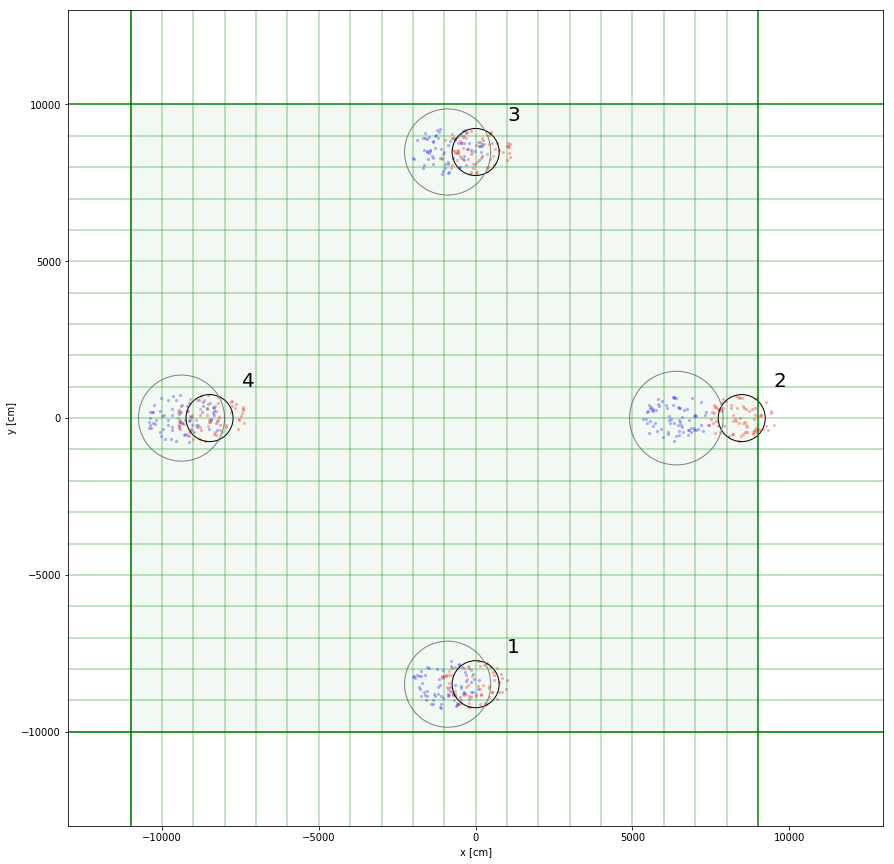

In [19]:
telescope_positions = np.array([[0., -8485., 750., 750.],
                                [8485., 0., 1750., 750.],
                                [0., 8485., 750., 750.],
                                [-8485., 0., 750., 750.]]
                              )

# Perpendicular projection
circle1 = plt.Circle((0, -8485), 750, color='black', fill=False)
circle2 = plt.Circle((8485, 0), 750, color='black', fill=False)
circle3 = plt.Circle((0, 8485), 750, color='black', fill=False)
circle4 = plt.Circle((-8485, 0), 750, color='black', fill=False)

projected_radius1 = 1.372854E+03
projected_radius2 = 1.492029E+03

# Projection according to shower direction
proj_circle1 = plt.Circle((-8.938152E+02, -8.485000E+03), projected_radius1, color='gray', fill=False)
proj_circle2 = plt.Circle((6.399431E+03, -1.823262E-04), projected_radius2, color='gray', fill=False)
proj_circle3 = plt.Circle((-8.938152E+02, 8.485000E+03), projected_radius1, color='gray', fill=False)
proj_circle4 = plt.Circle((-9.378815E+03, -7.813981E-05), projected_radius1, color='gray', fill=False)

circles = [circle1, circle2, circle3, circle4,
           proj_circle1, proj_circle2, proj_circle3, proj_circle4]

iact_file = "../fluorescence-corsika/corsika-76300/output/run3_1TeV50sh50deg/iact_3.dat"

fig, ax = plt.subplots(figsize=(15, 15))
ax.set_aspect(1)
ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_xlim(-13000,13000)
ax.set_ylim(-13000,13000)


with IACTFile(iact_file) as f:
    print(f)
    for n in range(len(f)):
        event = f[n]
        for itel, position in zip(event.photon_bunches, telescope_positions):
            
            f_bunches = event.photon_bunches[itel][event.photon_bunches[itel]['photons'] < 0]
            c_bunches = event.photon_bunches[itel][event.photon_bunches[itel]['photons'] > 0]
            
            #  Fluorescence bunches
            if any(f_bunches):
                for bunch in f_bunches:

                    cz = np.sqrt(1 - bunch['cx']**2 - bunch['cy']**2)
                    obslevel = event.header.observation_levels[0]
                    radius = 750.
                    
                    x_tel = bunch['x'] + position[0]
                    y_tel = bunch['y'] + position[1]
                    z_tel = obslevel + position[2]
                    
                    x_emis = x_tel - ((bunch['zem'] - z_tel) / cz) * bunch['cx']
                    y_emis = y_tel - ((bunch['zem'] - z_tel) / cz) * bunch['cy']
                    z_emis = bunch['zem']
                    
                    x_obs = x_tel + (position[2] / cz) * bunch['cx']
                    y_obs = y_tel + (position[2] / cz) * bunch['cy']
                    z_obs = obslevel
                    
                    ax.scatter(x=x_tel, y=y_tel,
                        c='red', s=10, alpha=0.3, lw=0 )
                    
                    ax.scatter(x=x_obs, y=y_obs, 
                               c='blue', s=10, alpha=0.3, lw=0)

# Plot grid and projections of the telescopes:
grid_x_low = -11000
grid_x_high = 9000
grid_y_low = -10000
grid_y_high = 10000

ax.axvline(grid_x_low, color="green")
ax.axvline(grid_x_high, color="green")
ax.axhline(grid_y_low, color="green")
ax.axhline(grid_y_high, color="green")

for i in range(20):
    ax.axvline(grid_x_low + 1000 * i, color="green", alpha=0.3)
    ax.axhline(grid_y_low + 1000 * i, color="green", alpha=0.3)

for circle in circles:
    ax.add_artist(circle)
    
ax.fill([grid_x_low, grid_x_high, grid_x_high, grid_x_low],
        [grid_y_low, grid_y_low, grid_y_high, grid_y_high],
        'green', alpha=0.05)

for itel, position in enumerate(telescope_positions):
    ax.text(position[0]+1000, position[1]+1000, itel + 1, fontsize=20)

Telescope 2 is 1750 cm above the observational level, so its shadow onto observation level is different. The rest of them are risen 750 cm (i.e. its radius)

IACTFile(
  path=../fluorescence-corsika/corsika-76300/output/run4_1TeV50sh50deg/iact_4.dat
  n_telescopes=4
  n_events=50
)


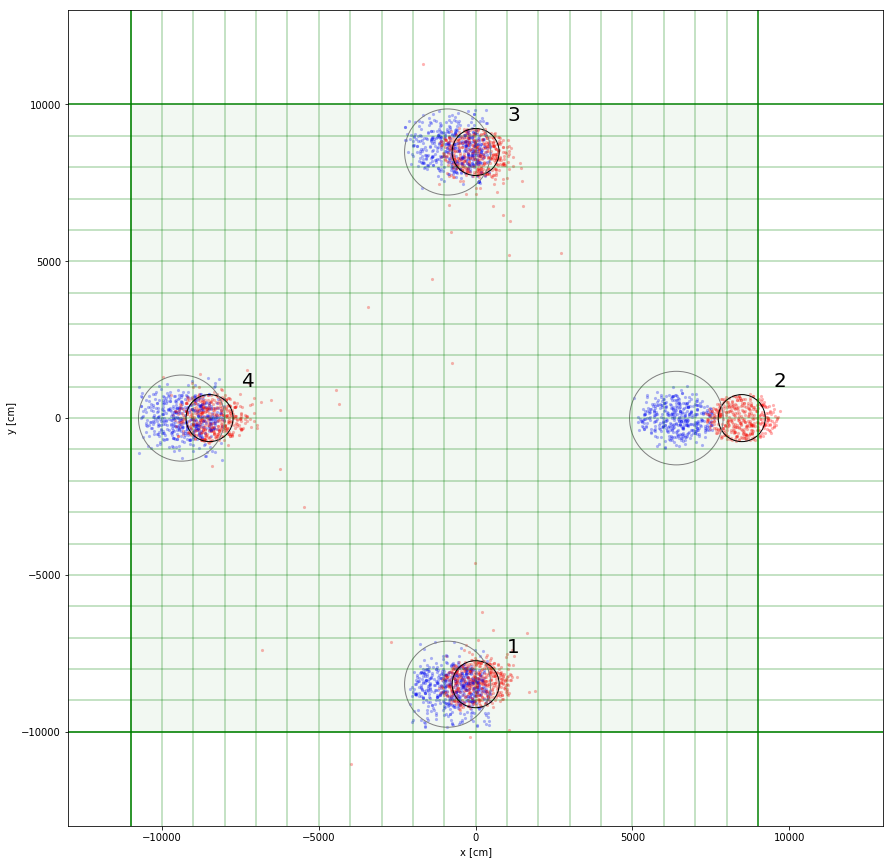

In [30]:
telescope_positions = np.array([[0., -8485., 750., 750.],
                                [8485., 0., 1750., 750.],
                                [0., 8485., 750., 750.],
                                [-8485., 0., 750., 750.]]
                              )

# Perpendicular projection
circle1 = plt.Circle((0, -8485), 750, color='black', fill=False)
circle2 = plt.Circle((8485, 0), 750, color='black', fill=False)
circle3 = plt.Circle((0, 8485), 750, color='black', fill=False)
circle4 = plt.Circle((-8485, 0), 750, color='black', fill=False)

projected_radius1 = 1.372854E+03
projected_radius2 = 1.492029E+03

# Projection according to shower direction
proj_circle1 = plt.Circle((-8.938152E+02, -8.485000E+03), projected_radius1, color='gray', fill=False)
proj_circle2 = plt.Circle((6.399431E+03, -1.823262E-04), projected_radius2, color='gray', fill=False)
proj_circle3 = plt.Circle((-8.938152E+02, 8.485000E+03), projected_radius1, color='gray', fill=False)
proj_circle4 = plt.Circle((-9.378815E+03, -7.813981E-05), projected_radius1, color='gray', fill=False)

circles = [circle1, circle2, circle3, circle4,
           proj_circle1, proj_circle2, proj_circle3, proj_circle4]

iact_file = "../fluorescence-corsika/corsika-76300/output/run4_1TeV50sh50deg/iact_4.dat"

fig, ax = plt.subplots(figsize=(15, 15))
ax.set_aspect(1)
ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_xlim(-13000,13000)
ax.set_ylim(-13000,13000)


with IACTFile(iact_file) as f:
    print(f)
    for n in range(len(f)):
        event = f[n]
        for itel, position in zip(event.photon_bunches, telescope_positions):
            
            f_bunches = event.photon_bunches[itel][event.photon_bunches[itel]['photons'] < 0]
            c_bunches = event.photon_bunches[itel][event.photon_bunches[itel]['photons'] > 0]
            
            #  Fluorescence bunches
            if any(f_bunches):
                for bunch in f_bunches:

                    cz = np.sqrt(1 - bunch['cx']**2 - bunch['cy']**2)
                    obslevel = event.header.observation_levels[0]
                    radius = 750.
                    
                    x_tel = bunch['x'] + position[0]
                    y_tel = bunch['y'] + position[1]
                    z_tel = obslevel + position[2]
                    
                    x_emis = x_tel - ((bunch['zem'] - z_tel) / cz) * bunch['cx']
                    y_emis = y_tel - ((bunch['zem'] - z_tel) / cz) * bunch['cy']
                    z_emis = bunch['zem']
                    
                    x_obs = x_tel + (position[2] / cz) * bunch['cx']
                    y_obs = y_tel + (position[2] / cz) * bunch['cy']
                    z_obs = obslevel
                    
                    ax.scatter(x=x_tel, y=y_tel,
                        c='red', s=10, alpha=0.3, lw=0 )
                    
                    ax.scatter(x=x_obs, y=y_obs, 
                               c='blue', s=10, alpha=0.3, lw=0)

# Plot grid and projections of the telescopes:
grid_x_low = -11000
grid_x_high = 9000
grid_y_low = -10000
grid_y_high = 10000

ax.axvline(grid_x_low, color="green")
ax.axvline(grid_x_high, color="green")
ax.axhline(grid_y_low, color="green")
ax.axhline(grid_y_high, color="green")

for i in range(20):
    ax.axvline(grid_x_low + 1000 * i, color="green", alpha=0.3)
    ax.axhline(grid_y_low + 1000 * i, color="green", alpha=0.3)

for circle in circles:
    ax.add_artist(circle)
    
ax.fill([grid_x_low, grid_x_high, grid_x_high, grid_x_low],
        [grid_y_low, grid_y_low, grid_y_high, grid_y_high],
        'green', alpha=0.05)

for itel, position in enumerate(telescope_positions):
    ax.text(position[0]+1000, position[1]+1000, itel + 1, fontsize=20)

IACTFile(
  path=../fluorescence-corsika/corsika-76300/output/run5_10TeV10sh50deg/iact_5.dat
  n_telescopes=4
  n_events=10
)


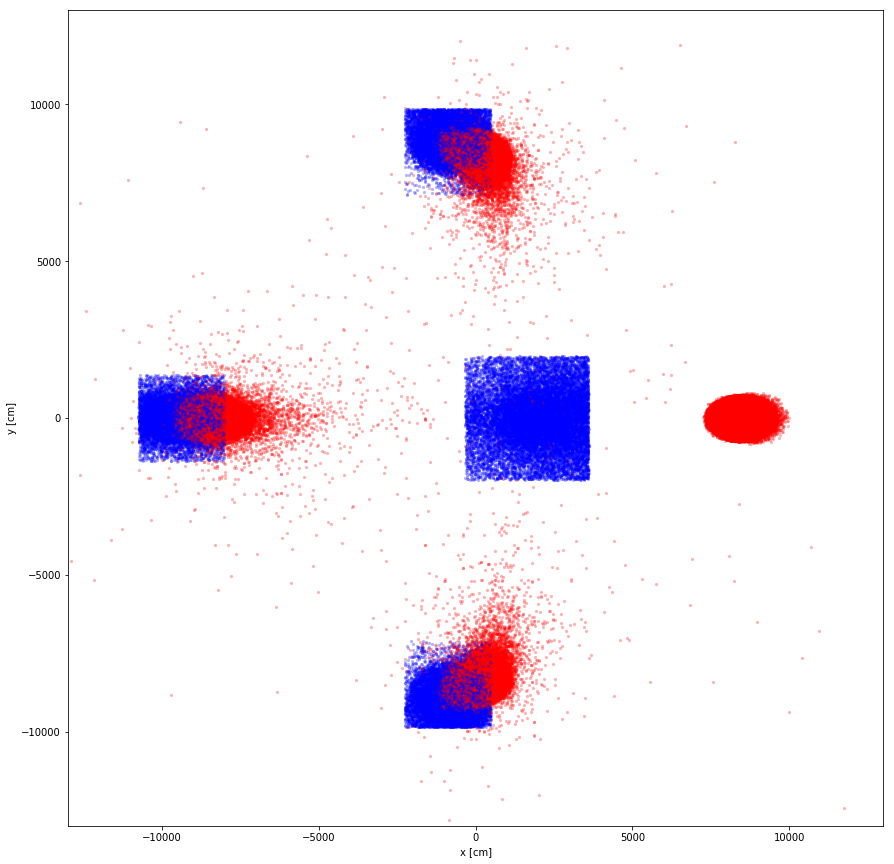

In [32]:
telescope_positions = np.array([[0., -8485., 750., 750.],
                                [8485., 0., 5750., 750.],
                                [0., 8485., 750., 750.],
                                [-8485., 0., 750., 750.]]
                              )

# Perpendicular projection
circle1 = plt.Circle((0, -8485), 750, color='black', fill=False)
circle2 = plt.Circle((8485, 0), 750, color='black', fill=False)
circle3 = plt.Circle((0, 8485), 750, color='black', fill=False)
circle4 = plt.Circle((-8485, 0), 750, color='black', fill=False)

projected_radius1 = 1.372854E+03
projected_radius2 = 1.968730E+03

# Projection according to shower direction
proj_circle1 = plt.Circle((-8.938152E+02, -8.485000E+03), projected_radius1, color='gray', fill=False)
proj_circle2 = plt.Circle((1.632417E+03, -5.990719E-04), projected_radius2, color='gray', fill=False)
proj_circle3 = plt.Circle((-8.938152E+02, 8.485000E+03), projected_radius1, color='gray', fill=False)
proj_circle4 = plt.Circle((-9.378815E+03, -7.813981E-05), projected_radius1, color='gray', fill=False)

circles = [circle1, circle2, circle3, circle4,
           proj_circle1, proj_circle2, proj_circle3, proj_circle4]

iact_file = "../fluorescence-corsika/corsika-76300/output/run5_10TeV10sh50deg/iact_5.dat"

fig, ax = plt.subplots(figsize=(15, 15))
ax.set_aspect(1)
ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_xlim(-13000,13000)
ax.set_ylim(-13000,13000)


with IACTFile(iact_file) as f:
    print(f)
    for n in range(len(f)):
        event = f[n]
        for itel, position in zip(event.photon_bunches, telescope_positions):
            
            f_bunches = event.photon_bunches[itel][event.photon_bunches[itel]['photons'] < 0]
            c_bunches = event.photon_bunches[itel][event.photon_bunches[itel]['photons'] > 0]
            
            #  Fluorescence bunches
            if any(f_bunches):
                for bunch in f_bunches:

                    cz = np.sqrt(1 - bunch['cx']**2 - bunch['cy']**2)
                    obslevel = event.header.observation_levels[0]
                    radius = 750.
                    
                    x_tel = bunch['x'] + position[0]
                    y_tel = bunch['y'] + position[1]
                    z_tel = obslevel + position[2]
                    
                    x_emis = x_tel - ((bunch['zem'] - z_tel) / cz) * bunch['cx']
                    y_emis = y_tel - ((bunch['zem'] - z_tel) / cz) * bunch['cy']
                    z_emis = bunch['zem']
                    
                    x_obs = x_tel + (position[2] / cz) * bunch['cx']
                    y_obs = y_tel + (position[2] / cz) * bunch['cy']
                    z_obs = obslevel
                    
                    ax.scatter(x=x_tel, y=y_tel,
                        c='red', s=10, alpha=0.3, lw=0 )
                    
                    ax.scatter(x=x_obs, y=y_obs, 
                               c='blue', s=10, alpha=0.3, lw=0)

# # Plot grid and projections of the telescopes:
# grid_x_low = -11000
# grid_x_high = 9000
# grid_y_low = -10000
# grid_y_high = 10000

# ax.axvline(grid_x_low, color="green")
# ax.axvline(grid_x_high, color="green")
# ax.axhline(grid_y_low, color="green")
# ax.axhline(grid_y_high, color="green")

# for i in range(20):
#     ax.axvline(grid_x_low + 1000 * i, color="green", alpha=0.3)
#     ax.axhline(grid_y_low + 1000 * i, color="green", alpha=0.3)

# for circle in circles:
#     ax.add_artist(circle)
    
# ax.fill([grid_x_low, grid_x_high, grid_x_high, grid_x_low],
#         [grid_y_low, grid_y_low, grid_y_high, grid_y_high],
#         'green', alpha=0.05)

# for itel, position in enumerate(telescope_positions):
#     ax.text(position[0]+1000, position[1]+1000, itel + 1, fontsize=20)